For $f(x)=sin(\pi~x)$ on $[-1,1]$.  Compute $\mathcal{L}_4$ and $\mathcal{H}_4$.  Build plots, estimate which approximation is better

In [85]:
import numpy as np
import math
from scipy.interpolate import lagrange, PchipInterpolator
from scipy import special

In [86]:
# x = np.linspace(-1, 1, num=4, endpoint=True) # equally spaced nodes, including endpoint, throws off peaks for n=4
x = np.array([-1, -1/2, 1/2, 1]) # non-equally spaced nodes, use me for n = 4 to catch the critical points of the sin function
# y = [math.sin(math.pi * j) for j in x]
y= np.sin(np.pi * x)
poly_l = lagrange(x, y)
# poly_h = special.hermite(4, monic=True) # monic=True scales the leading coefficient to 1, wrong approach
poly_h = PchipInterpolator(x,y) #PCHIP Piecewise Cubic Hermite Interpolating Polynomial
# print('x=',x,'\ny=',y) # test print
# print('poly_h=',poly_h) # test print

In [87]:
from numpy.polynomial.polynomial import Polynomial
# print(Polynomial(poly_l.coef[::-1]).coef) # test print
x_sin = np.linspace(-1, 1, 100, endpoint=True)

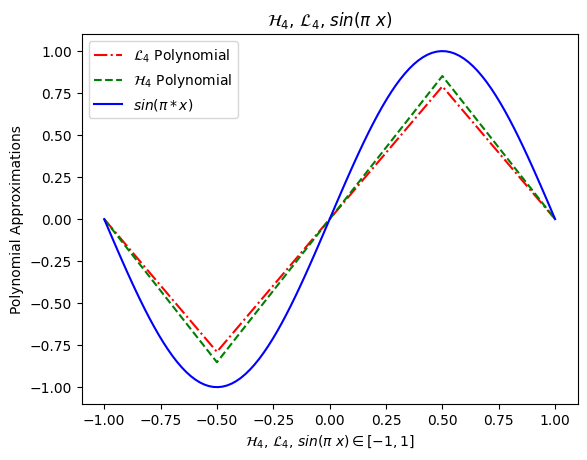

In [88]:
import matplotlib.pyplot as plt
# x_new = np.arange(-1,1,0.5)
x_new = np.linspace(-1, 1, num=4, endpoint=True)
y_poly_h = poly_h(x_new)
y_sin = [math.sin(math.pi * k) for k in x_sin]
plt.plot(x, Polynomial(poly_l.coef[::-1])(x_new), label=r'$\mathcal{L}_{4}$ Polynomial', color='red', linestyle='-.')
plt.plot(x, y_poly_h, label=r'$\mathcal{H}_{4}$ Polynomial', color='green', linestyle='--')
plt.plot(x_sin, y_sin, label=r'$sin(\pi*x)$', linestyle='solid', color='blue')
plt.legend(loc='upper left')
plt.title(r'$\mathcal{H}_{4}$, $\mathcal{L}_{4}$, $sin(\pi~x)$')
plt.xlabel(r'$\mathcal{H}_{4}$, $\mathcal{L}_{4}$, $sin(\pi~x) \in [-1, 1]$')
plt.ylabel('Polynomial Approximations')
plt.savefig('lagrange_hermite_sin_interpolation_nIs4.jpeg', dpi=1200)
plt.show()

Based on the plot it appears $\mathcal{H}_{4}$ is better than $\mathcal{L}_{4}$ for approximating $sin(\pi~x)$ on the domain $[-1.1]$.  However, one can see that by increasing the number of points to 10 both become almost identical approximations.
